In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import seaborn as sns

In [2]:
df = pd.read_csv('cancer_diagnosis.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
X = df.drop(columns='diagnosis')
y = df['diagnosis']

In [8]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [10]:
y.head(5)

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X[:1])

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]


In [14]:
le = LabelEncoder()
y = le.fit_transform(y)
print(y[:5])

[1 1 1 1 1]


In [15]:
le.classes_

array(['B', 'M'], dtype=object)

In [16]:
y = keras.utils.to_categorical(y, num_classes=2)
print(y[:5])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.25, shuffle=True, random_state=69)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [19]:
x_train.shape

(426, 30)

In [33]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax'))

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,114
Trainable params: 2,114
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(x_train, y_train, batch_size=200, epochs=50, verbose=2)

Epoch 1/50
3/3 - 0s - loss: 0.8673 - accuracy: 0.3709 - 274ms/epoch - 91ms/step
Epoch 2/50
3/3 - 0s - loss: 0.7649 - accuracy: 0.4765 - 30ms/epoch - 10ms/step
Epoch 3/50


2023-02-09 04:14:13.862312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 - 0s - loss: 0.6455 - accuracy: 0.5915 - 29ms/epoch - 10ms/step
Epoch 4/50
3/3 - 0s - loss: 0.5613 - accuracy: 0.7207 - 29ms/epoch - 10ms/step
Epoch 5/50
3/3 - 0s - loss: 0.4822 - accuracy: 0.8075 - 27ms/epoch - 9ms/step
Epoch 6/50
3/3 - 0s - loss: 0.4201 - accuracy: 0.8638 - 27ms/epoch - 9ms/step
Epoch 7/50
3/3 - 0s - loss: 0.3745 - accuracy: 0.8967 - 27ms/epoch - 9ms/step
Epoch 8/50
3/3 - 0s - loss: 0.3344 - accuracy: 0.9061 - 25ms/epoch - 8ms/step
Epoch 9/50
3/3 - 0s - loss: 0.3072 - accuracy: 0.9225 - 26ms/epoch - 9ms/step
Epoch 10/50
3/3 - 0s - loss: 0.2803 - accuracy: 0.9225 - 27ms/epoch - 9ms/step
Epoch 11/50
3/3 - 0s - loss: 0.2548 - accuracy: 0.9460 - 28ms/epoch - 9ms/step
Epoch 12/50
3/3 - 0s - loss: 0.2323 - accuracy: 0.9413 - 26ms/epoch - 9ms/step
Epoch 13/50
3/3 - 0s - loss: 0.2236 - accuracy: 0.9460 - 29ms/epoch - 10ms/step
Epoch 14/50
3/3 - 0s - loss: 0.2095 - accuracy: 0.9437 - 26ms/epoch - 9ms/step
Epoch 15/50
3/3 - 0s - loss: 0.1901 - accuracy: 0.9531 - 25ms/epoch

In [36]:
prediction = model.predict(x_test)
print(prediction[:5])

prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

5/5 [==============================] - 0s 5ms/step
[[0.04703222 0.9529677 ]
 [0.00108477 0.9989152 ]
 [0.04535394 0.9546461 ]
 [0.78070396 0.21929607]
 [0.02570399 0.97429603]]
[1 1 1 0 1]


2023-02-09 04:14:26.672867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [37]:
print(y_test[:5])
actual = np.argmax(y_test, axis=-1)
print(actual[:5])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
[1 1 1 0 1]


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
ac_score = accuracy_score(actual, prediction)
print(ac_score)

0.965034965034965


In [39]:
c_matrix = confusion_matrix(actual, prediction)
print(c_matrix)

[[76  1]
 [ 4 62]]


Text(50.722222222222214, 0.5, 'actual')

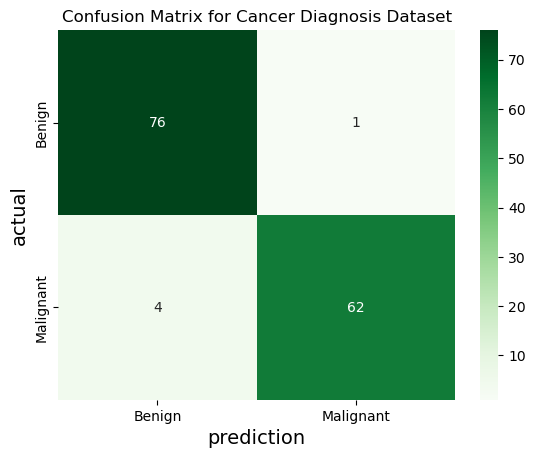

In [40]:
label = ['Benign','Malignant']
ax = sns.heatmap(c_matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label)
ax.set_title('Confusion Matrix')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)